Sklonujmy sobie najpierw repozytorium z danymi

In [26]:
!git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


!ls ML-datasets 

# Budowa modelu na danych rzeczywistych

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'},
              'diabetes': {'class_column': 'Class', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

Skorzystamy ze zbioru diabets

In [35]:
X, y, classes = prepare_dataset("diabetes")

In [36]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
y.value_counts()

class
0    500
1    268
Name: count, dtype: int64

Podejrzyjmy co to za zbór

In [38]:
classes

array(['positive', 'negative'], dtype=object)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y)

Dzielimy dataset na zbiory treningowy i testowy

Trenujemy model na danych treningowych

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

In [41]:
model = LogisticRegression(random_state=30)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       125
           1       0.75      0.63      0.68        67

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
f1_score(y_test, y_pred)

0.6829268292682927

In [43]:
y_pred[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int8)

In [44]:
model = DecisionTreeClassifier(random_state=30)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       125
           1       0.65      0.66      0.65        67

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192



In [45]:
f1_score(y_test, y_pred)

0.6518518518518519

Stwórzmy następnie macierz pomyłek i wyliczmy miary jakości klasyfikacji

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[101,  24],
       [ 23,  44]])

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

Możemy też obliczyć wartości pozostałych metryk klasyfikacji korzystając z wbudowanych funkcji.

Możemy jeszcze spróbować wyświetlić to w formie wykresu.

Sprawdzenie czy model jest przetrenowany:

Możemy też regresję logistyczną zastosować dla zbiorów o wielu etykietach. Stosujemy wówczas strategię One versus Rest (trenujemy tyle klasyfikatorów, ile mamy klas) - sklearn robi to automatycznie.

**Zadanie:**

Dla zbioru danych diabets wytrenuj model regresji logistycznej i narysuj krzywą ROC. Zwróć uwagę na różnice w funkcjach:
* predict()
* predict_proba()

Patrząc na krzywą ROC zastanów się czy model jest dobrze wytrenowany, przetrenowany czy wytrenowany niewystarczająco dobrze.

In [56]:
X, y, classes = prepare_dataset("diabetes")

In [64]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

In [57]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [58]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int8

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, random_state=30)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1_score: ", f1_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))

f1_score:  0.6666666666666667
recall_score:  0.6716417910447762
precision_score:  0.6617647058823529


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       125
           1       0.66      0.67      0.67        67

    accuracy                           0.77       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



In [119]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=30)
# model = DecisionTreeClassifier()

# gs = GridSearchCV(model,
#                   param_grid={'max_depth': range(1, 20, 4),
#                               'min_samples_split': range(1, 100, 10)},
#                   cv=10,
#                   scoring='neg_mean_absolute_error')
# gs.fit(X_train, y_train)

# best_params = gs.best_params_
# model.set_params(**best_params)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print("f1_score: ", f1_score(y_test, y_pred))
# print("recall_score: ", recall_score(y_test, y_pred))
# print("precision_score: ", precision_score(y_test, y_pred))

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       125
           1       0.66      0.67      0.67        67

    accuracy                           0.77       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



In [121]:
from sklearn.metrics import roc_auc_score

Korzystając z wbudwanej funkcji sklearn roc_auc_score importowanej podobnie jak accuracy_score, precision_score, recall_score, f1_score z modułu sklearn.metrics oblicz pole pod krzywą ROC:

In [122]:
roc_auc_score(y_test, y_pred)

0.7438208955223881

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

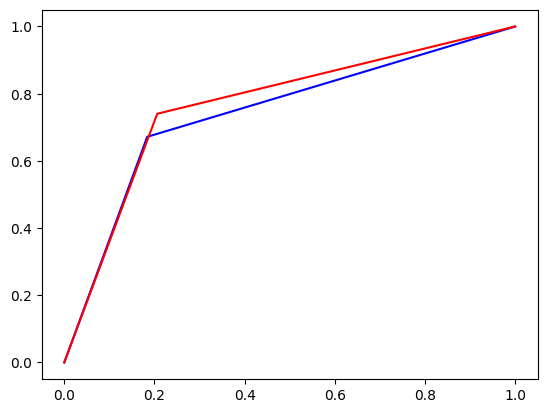

In [137]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Oblicz wartości TPR, FPR i próg
num_true_positives = sum((y_test == 1) & (y_pred == 1))
num_false_positives = sum((y_test == 0) & (y_pred == 1))
num_true_negatives = sum((y_test == 0) & (y_pred == 0))
num_false_negatives = sum((y_test == 1) & (y_pred == 0))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr_t, tpr_t, thresholds = roc_curve(model.predict(X_train), y_train)


# Oblicz pole pod krzywą ROC (AUC)
roc_auc = roc_auc_score(y_test, y_pred)

# Narysuj krzywą ROC z polem pod krzywą

plt.figure()

plt.plot(fpr, tpr, color='blue')
plt.plot(fpr_t, tpr_t, color='red')

plt.figure([0, 1, 0, 1])
plt.title('Krzywa ROC')
plt.legend(loc="upper right")
plt.show()

**Zadanie:** Przetestuj walidację krzyżową na analizowanym wcześniej zbiorze:

In [72]:
from sklearn.model_selection import cross_val_score

iteracja 1: trening: a,b,c,d, test: e <br>
iteracja 2: trening: a,b,c,e, test: d <br>
iteracja 3: trening: a,b,d,e, test: c <br>
iteracja 4: trening: a,c,d,e, test: b <br>
iteracja 5: trening: b,c,d,e, test: a <br>

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=30)

model = LogisticRegression(random_state = 30,)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'precision_macro')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [77]:
scores

array([0.70694444, 0.67036898, 0.78732446, 0.72779304, 0.8331044 ])

# Regularyzacja, czyli jak przeciwdziałać overfittingowi. Czy to jest w ogóle problem? Sprawdźmy!

In [138]:
wine, wine_calsses = load_dataset("wine", "Class")

In [139]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [141]:
y = wine.pop("class")

In [145]:
X = wine
y.value_counts()

class
2    71
0    59
1    48
Name: count, dtype: int64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=30)

model = LogisticRegression( random_state= 30, max_iter=100)
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=30)

In [157]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [158]:
f_train = f1_score(y_train, y_pred_train, average="weighted")
f_test = f1_score(y_test, y_pred, average="weighted")
print(f_train)
print(f_test)

0.9849267872523688
0.8868686868686868


Regularyzacja:

In [160]:
model = LogisticRegression( random_state= 30, max_iter=100, penalty = "l2", C = 0.1)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

f_train = f1_score(y_train, y_pred_train, average="weighted")
f_test = f1_score(y_test, y_pred, average="weighted")
print(f_train)
print(f_test)

0.9624520534336163
0.9098856209150327


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Przetestujmy teraz jednocześnie wiele wartości parametru regularyzacji

In [161]:
import numpy as np
import pandas as pd

In [169]:
C_values = [10.0 ** x for x in np.arange(-3, 2, 1)]
C_values

[0.001, 0.01, 0.1, 1.0, 10.0]

In [172]:
train_errors = []
valid_errors = []

for C_value in C_values:
    model = LogisticRegression(random_state= 30, max_iter=100, penalty = "l2", C = C_value)
    
    model.fit(X_train, y_train)
    
    
    train_errors.append(model.score(X_train, y_train))
    valid_errors.append(model.score(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

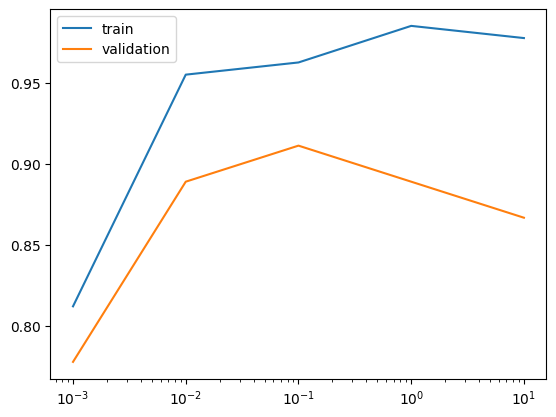

In [173]:
plt.semilogx(C_values, train_errors, C_values, valid_errors)
plt.legend(("train", "validation"))

Skorzystajmy teraz z metody Grid Search. Regularyzacja l1 udostępnia selekcję cech, o możemy zobaczyć tu:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [175]:
lr = LogisticRegression( solver="liblinear", random_state=30)

params = {
    "C": [10.0 ** x for x in np.arange(-3, 2, 1)],
    "penalty": ["l1", "l2"],
    "max_iter": [100, 200, 300]}

In [178]:
searcher = GridSearchCV( lr, param_grid=params, cv=3, n_jobs=-1)
searcher.fit(X_train, y_train)

## Alternatywą do GridSearchCV, jest Randomized search 
# Najlepiej póścić Randomized i po tym stworzyć Grid search

GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=30, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']})

In [179]:
best_lr = searcher.best_estimator_
best_params = searcher.best_params_

In [181]:
best_lr

LogisticRegression(C=0.1, random_state=30, solver='liblinear')

In [180]:
best_params

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

In [184]:
searcher.score(X_train, y_train)

0.9624060150375939

In [185]:
searcher.score(X_test, y_test)

0.9111111111111111

# Granice decyzyjne na sztucznie wygenerowanym zbiorze:

Zaczniemy od wygenerowania sztucznego zbioru do klasyfikacji, składającego się z dwóch zbiorów punktów z rozkładu normalnego.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))


# np.vstack - połaczenie tablic wertykalne
# np.hstack - połączenie tablic horyzontalne

Wyświetlimy je w postaci wykresu punktowego, wraz z linią dokładnie pomiędzy środkami obu rozkładów:

Na tak utworzonym zbiorze wytrenujemy model regresji logistycznej

Stwórzmy zbiór testowy poprzez rozszerzenie zakresu zbioru treningowego.

Funkcja ta zwraca meshgrid (czyli listę indeksów punktów z zadanego przedziału) na podstawie wygenerowanego zbioru danych.

Dokonujemy predykcji oraz wyświetlamy wszystkie punkty pcolormeshem, żeby zobaczyć w jaki sposób regresja logistyczna dokonała podziału przestrzeni.

Zwróćmy uwagę na fakt, że jest tutaj linia prosta.